# Project

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
customerD = pd.read_csv("customer_details.csv")
customerPD = pd.read_csv("customer_policy_details.csv")

1. Add the column names to both datasets:

i. Column Name for customer details table:

In [3]:
customerD.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [4]:
customerD.rename(columns={'0':'customer_id', '1':'Gender', '2':'age', '3':'driving licence present', '4':'region code','5':'previously insured', '6':'vehicle age', '7':'vehicle damage'})

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [5]:
customerD=customerD.rename(columns={'0':'customer_id', '1':'Gender', '2':'age', '3':'driving licence present', '4':'region code','5':'previously insured', '6':'vehicle age', '7':'vehicle damage'})

In [6]:
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


In [7]:
customerD.columns

Index(['customer_id', 'Gender', 'age', 'driving licence present',
       'region code', 'previously insured', 'vehicle age', 'vehicle damage'],
      dtype='object')

ii. Column Name for customer_policy table:

In [8]:
customerPD.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [9]:
customerPD.rename(columns={'0':'customer_id', '1':'annual premium (in Rs)', '2':'sales channel code', '3':'vintage','4':'response'})

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [10]:
customerPD=customerPD.rename(columns={'0':'customer_id', '1':'annual premium (in Rs)', '2':'sales channel code', '3':'vintage','4':'response'})

In [11]:
customerPD.columns

Index(['customer_id', 'annual premium (in Rs)', 'sales channel code',
       'vintage', 'response'],
      dtype='object')

2. Checking and Cleaning Data Quality:

i. Null values

Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean.

Replace all null values for Categorical value by mode.

ii. Outliers
Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 

(Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

Hint2: For getting percentile value, explore pd.describe() function)

iii. White spaces

Remove white spaces

iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 

for future modeling use if required
vi. Drop Duplicates (duplicated rows)

i. Null values Sum of the null data

In [12]:
customerPD.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [13]:
customerD.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

Drop Null values for customer_id

In [14]:
customerD["customer_id"].isna().sum()

386

In [15]:
customerPD["customer_id"].isna().sum()

387

In [16]:
customerD["customer_id"].count()

380723

In [17]:
customerPD["customer_id"].count()

380722

In [18]:
# customer_id Drop Null values for customer_id

customerPD=customerPD.dropna(subset=['customer_id'])

Replace all null values for numeric columns by mean

In [19]:
customerPD['annual premium (in Rs)'].fillna((customerPD['annual premium (in Rs)'].mean()), inplace=True)

customerPD['annual premium (in Rs)'].mean()

30563.99977390893

In [20]:
customerPD['vintage'].fillna((customerPD['vintage'].mean()), inplace=True)
customerPD['vintage'].mean()

154.34719220474696

In [21]:
customerPD.isnull().sum()

customer_id                 0
annual premium (in Rs)      0
sales channel code        400
vintage                     0
response                  361
dtype: int64

In [22]:
customerPD['response'].fillna((customerPD['response'].mode()[0]), inplace=True)
customerPD['response'].mode()

0    0.0
Name: response, dtype: float64

In [23]:
customerPD['sales channel code'].fillna((customerPD['sales channel code'].mode()[0]), inplace=True)
customerPD['sales channel code'].mode()

0    152.0
Name: sales channel code, dtype: float64

In [24]:
customerD.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

customer_id Drop Null values for customer_id

In [25]:
customerD=customerD.dropna(subset=['customer_id'])

In [26]:
customerD=customerD.dropna(subset=['vehicle damage'])
customerD=customerD.dropna(subset=['vehicle age'])
customerD=customerD.dropna(subset=['previously insured'])
customerD=customerD.dropna(subset=['region code'])
customerD=customerD.dropna(subset=['driving licence present'])
customerD=customerD.dropna(subset=['Gender'])

In [27]:
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


In [28]:
customerD['age'].fillna((customerD['age'].mean()), inplace=True)

In [29]:
#customerD['vehicle age'].fillna((customerD['vehicle age'].mean()), inplace=True)

ii. Outliers

Hint2: For getting percentile value, explore pd.describe() function)

In [30]:
customerPD.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.078674,154.347192,0.122410
std,110013.824148,17190.147550,54.192513,83.628096,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,136.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [31]:
customerD.describe()

,customer_id,age,driving licence present,region code,previously insured
count,378413.000000,378413.000000,378413.000000,378413.000000,378413.000000
mean,190562.809499,38.821208,0.997870,26.391976,0.458216
std,110019.038817,15.502568,0.046102,13.230725,0.498252
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95296.000000,25.000000,1.000000,15.000000,0.000000
50%,190554.000000,36.000000,1.000000,28.000000,0.000000
75%,285856.000000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [32]:
Q1 = customerPD.quantile(0.25)

Q3 = customerPD.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

customer_id               190542.50
annual premium (in Rs)     14975.75
sales channel code           123.00
vintage                      145.00
response                       0.00
dtype: float64


In [33]:
df_final=customerPD[~((customerPD<(Q1-1.5*IQR)) | (customerPD>(Q3+1.5*IQR)))]

<AxesSubplot:>

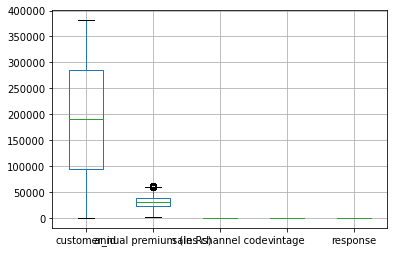

In [34]:
df_final.boxplot()

In [35]:
Q1 = customerD.quantile(0.25)

Q3 = customerD.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

customer_id                190560.0
age                            24.0
driving licence present         0.0
region code                    20.0
previously insured              1.0
dtype: float64


In [36]:
df_final2=customerD[~((customerD<(Q1-1.5*IQR)) | (customerD>(Q3+1.5*IQR)))]

C:\Users\patil\AppData\Local\Temp\ipykernel_10560\11749891.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final2=customerD[~((customerD<(Q1-1.5*IQR)) | (customerD>(Q3+1.5*IQR)))]


<AxesSubplot:>

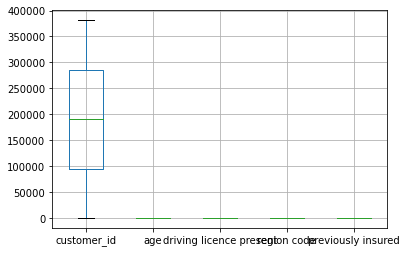

In [37]:
df_final2.boxplot()

Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual premium (in Rs)'>

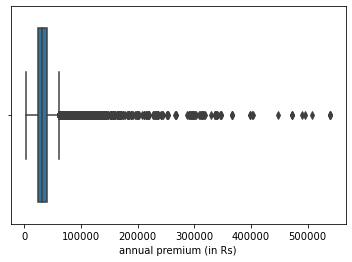

In [38]:
sns.boxplot(customerPD['annual premium (in Rs)'])

In [39]:
percentile25 = customerPD['annual premium (in Rs)'].quantile(0.25)
percentile75 = customerPD['annual premium (in Rs)'].quantile(0.75)

In [40]:
#iqr = np.subtract(*np.percentile(x, [75, 25]))
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

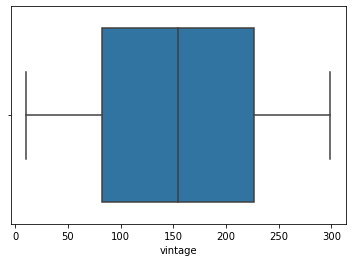

In [41]:
sns.boxplot(customerPD['vintage'])

C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales channel code'>

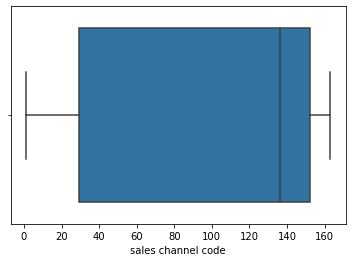

In [42]:
sns.boxplot(customerPD['sales channel code'])

Outliers customerD

C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

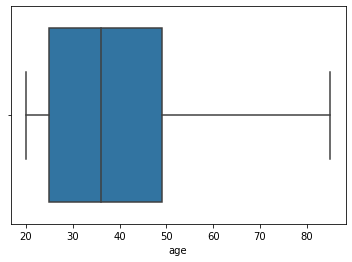

In [43]:
sns.boxplot(customerD['age'])

Create a Master table for future use. Join the customer table and

customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

In [44]:
customerD['type'] = 'customerD'
customerPD['type'] = 'customerPD'

master_data = pd.concat([customerD, customerPD])

In [45]:
master_data.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,type,annual premium (in Rs),sales channel code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,customerD,NaN,NaN,NaN,NaN
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,customerD,NaN,NaN,NaN,NaN


4.Company needs some important information from the master table to make decisions for future growth.They needs following information:

i. Gender wise average annual premium

ii. Age wise average annual premium

iii. Is your data balanced between the genders?

(Hint: Data is balanced if number of counts in each group is approximately same)

iv. Vehicle age wise average annual premium.

C:\Users\patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\patil\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\patil\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\patil\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

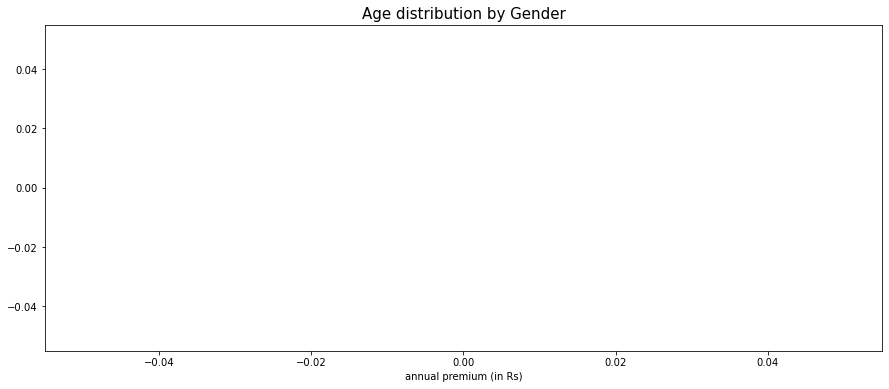

In [46]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['Gender'] == 1), 'annual premium (in Rs)'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(master_data.loc[(master_data['Gender'] == 0), 'annual premium (in Rs)'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['driving_license'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(master_data.loc[(master_data['driving_license'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()


5

Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables).

Correlation coefficient < -0.5 - Strong negative relationship

Correlation coefficient > 0.5 - Strong positive relationship

0.5 < Correlation coefficient < 0.5 - There is no relationship.

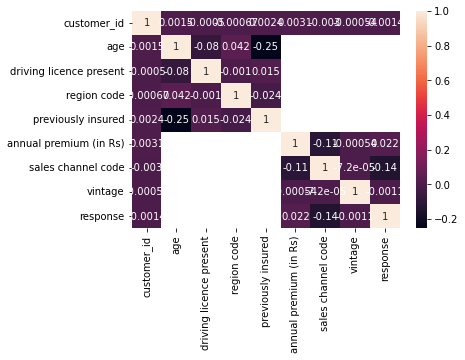

In [48]:
corrMatrix = master_data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()